## Module 6 - Case study 2

Case Study

Objectives:

1.Provide the learner some more practice for exploratory data analysis.

2.Equip the learner to fit and evaluate a linear regression model.

Questions:

1.Load the data from “cereal.csv” and plot histograms of sugar and vitamin content across different cereals.

[Hint: Extract values of a specific column using their labels and use hist method of pyplot ]

2. The names of the manufactures are coded using alphabets, create a new column with their full name using the below mapping.

'N': 'Nabisco', 'Q': 'Quaker Oats', 'K': 'Kelloggs', 'R': 'Raslston Purina', 'G': 'General Mills' , 'P' :'Post' , 'A':'American Home Foods Products'

Create a bar plot where each manufacturer is on the y axis and the height of the bars depict the number of cereals manufactured by them.

[Hint: Try using countplot this time or bar method of pyplot]

3. Extract the rating as your target variable ‘y’ and all numerical parameters as your predictors ‘x’. Separate 25% of your data as test set.

4. Fit a linear regression module and measure the mean squared error on test dataset.

[ Hint: Explore linear models and metrics section of sklearn documentation]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1.Load the data from “cereal.csv” and plot histograms of sugar and vitamin content across different cereals.

In [2]:
df = pd.read_csv(r'D:\E\Courses\Edureka\Assignments\Dataset\module6\cereal.csv')

In [3]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


plot for sugars against names

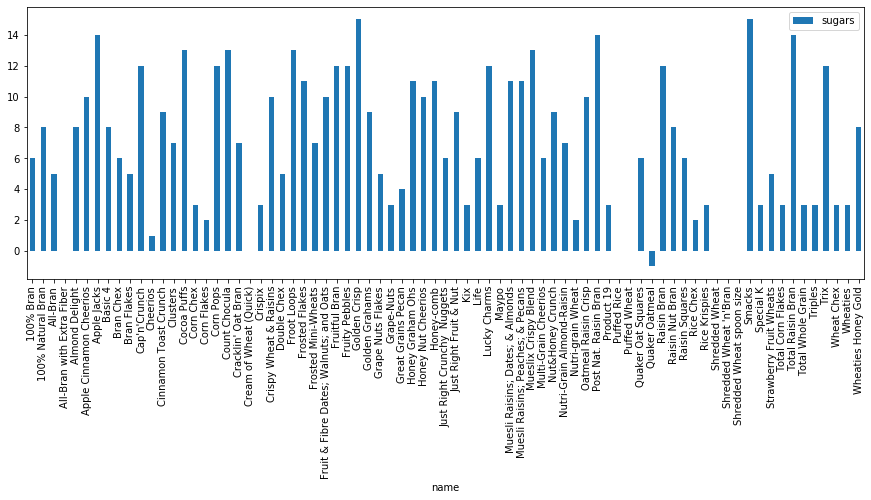

In [20]:
df[['name', 'sugars']].set_index(['name']).plot(figsize=(15,5), kind='bar')
plt.show()

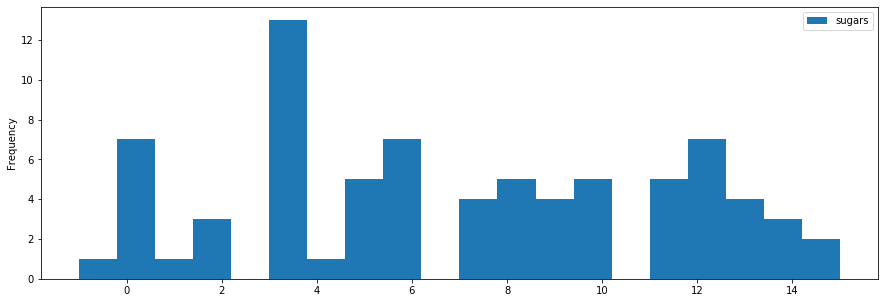

In [21]:
df[['sugars']].plot(figsize=(15,5), kind='hist', bins=20)
plt.show()

plot for vitamins

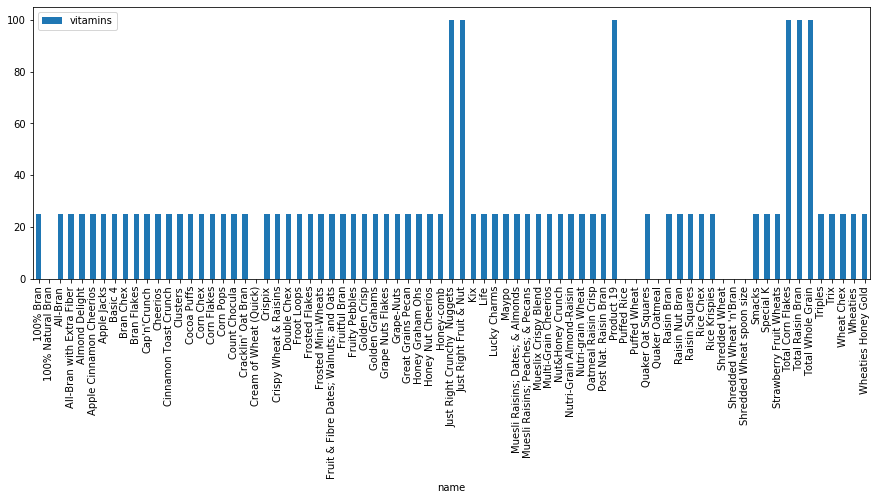

In [22]:
df[['name', 'vitamins']].set_index(['name']).plot(figsize=(15,5), kind='bar')
plt.show()

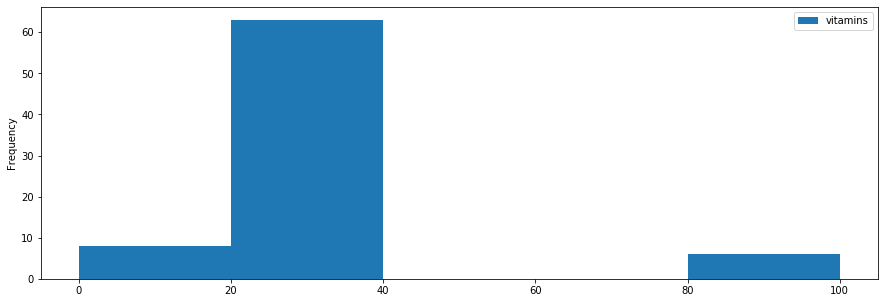

In [24]:
df[['vitamins']].plot(figsize=(15,5), kind='hist', bins=5)
plt.show()

2. The names of the manufactures are coded using alphabets, create a new column with their full name using the below mapping.


'N': 'Nabisco', 'Q': 'Quaker Oats', 'K': 'Kelloggs', 'R': 'Raslston Purina', 'G': 'General Mills' , 'P' :'Post' , 'A':'American Home Foods Products'


Create a bar plot where each manufacturer is on the y axis and the height of the bars depict the number of cereals manufactured by them.

In [25]:
dict1 = {'N': 'Nabisco', 'Q': 'Quaker Oats', 'K': 'Kelloggs', 'R': 'Raslston Purina', 'G': 'General Mills' , 'P' :'Post' , 'A':'American Home Foods Products'}

def name(x):
    return dict1[x]

df['mfr_fullname'] = df['mfr'].apply(name)

In [27]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_fullname
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina


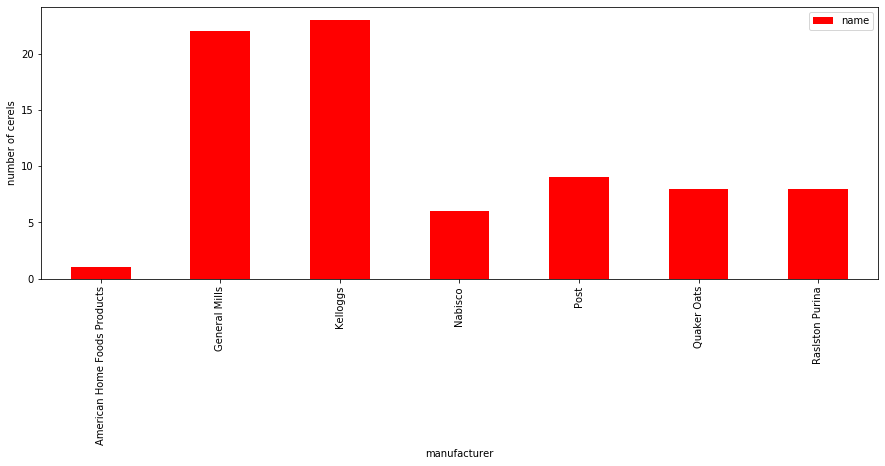

In [34]:
df.groupby(['mfr_fullname']).agg({'name':'count'}).plot(kind='bar', figsize=(15,5), color='r')
plt.xlabel('manufacturer')
plt.ylabel('number of cerels')
plt.show()

3. Extract the rating as your target variable ‘y’ and all numerical parameters as your predictors ‘x’. Separate 25% of your data as test set.

In [35]:
df.head(1)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_fullname
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco


In [42]:
# rating as dependant variable (y) and other numeric values as independant variable

x = df.iloc[:,3:15].values
y = df.iloc[:,15:16].values

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=41)

In [45]:
len(x_train), len(x_test), len(y_train), len(y_test)

(57, 20, 57, 20)

4. Fit a linear regression module and measure the mean squared error on test dataset.

In [46]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [47]:
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y_predict = lr_model.predict(x_test)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
r2_score(y_test, y_predict)

0.9999999999999987

In [52]:
mean_squared_error(y_test, y_predict)

1.5638238313479575e-13

r2_score is very much near to 1 and mean squared error is very less. So the model is a good one.